In [50]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# import roc_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [51]:
# Ler DB

df_certo = pd.read_csv("../app/database/breast-cancer-certo.csv")

df_certo.head(n=5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
# Copiar
df_copy = df_certo

In [53]:
# Transformar dados categóricos em valores
map = {"M" : 0, "B" : 1}

df_copy["diagnosis"] = df_copy["diagnosis"].map(map)

df_copy.head(n=5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
# Dropar id
df_copy = df_copy.drop(["id"], axis=1)

df_copy.head(n=5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
# Definir o target e a data

x = df_copy.drop(["diagnosis"], axis=1) #data
y = df_copy["diagnosis"] #target

In [56]:
# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [57]:
# Separando os dataframes em teste e treino
from sklearn.model_selection import train_test_split

random_state = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=random_state)

print(len(x_treino))
print(len(x_teste))

398
171


In [58]:
# aplicando selector
# Selector
selector = SelectKBest(score_func=chi2, k=2)

X_train_new = selector.fit_transform(x_treino, y_treino)
X_test_new = selector.transform(x_teste)

In [59]:
# Import verificação dos dados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

In [60]:
# Graficos
from sklearn.metrics import confusion_matrix

In [61]:
# Configurar as variveis
estimator = 30
learning = 0.03

# Adaboost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ada_boost = AdaBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = ada_boost.fit(X_train_new, y_treino)

ada_predict = model.predict(X_test_new)

ada_predict_prob = ada_boost.predict_proba(X_test_new)

## Gráficos

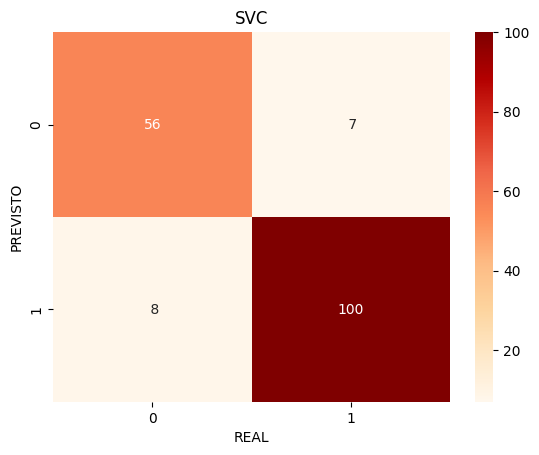

In [64]:
sns.heatmap(confusion_matrix(y_teste, ada_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

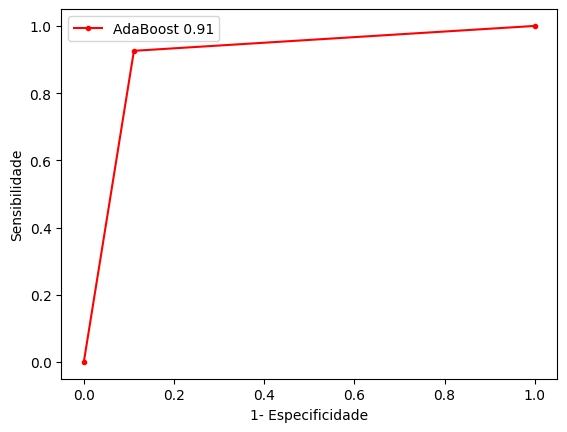

In [65]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
ada_curva_roc = roc_auc_score(y_teste,ada_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

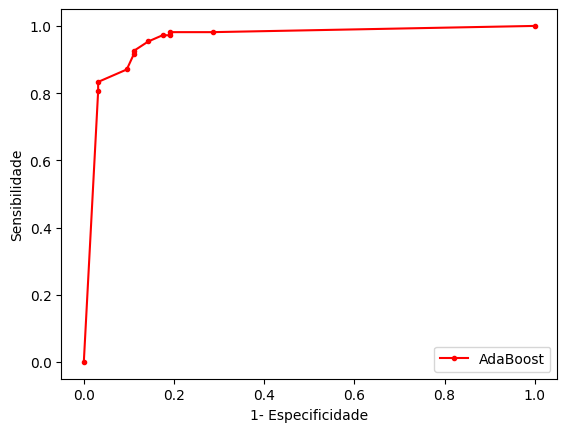

In [66]:
ada_probs = ada_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [67]:
acuracia = accuracy_score(y_teste,ada_predict)
precisao = precision_score(y_teste,ada_predict)
recall = recall_score(y_teste,ada_predict)
f1Score = f1_score(y_teste,ada_predict)
kappa = cohen_kappa_score(y_teste,ada_predict)

print('------ Adaboost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Adaboost ---------

Acurácia: 0.9122807017543859
Precisão: 0.9345794392523364
Recall ou Sensibilidade: 0.9259259259259259
F1-Score: 0.9302325581395349
Kappa: 0.8121292023731048


## GridSearchCV

In [68]:
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42]
}

In [69]:
# aplicação do grid serach
grid_search = GridSearchCV(ada_boost, parameters, cv=5)
grid_search.fit(X_train_new, y_treino)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.03, n_estimators=30,
                                          random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200], 'random_state': [42]})

In [70]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 42}


In [71]:
adaboost_best_param = grid_search.best_estimator_
y_predAda = adaboost_best_param.predict(X_test_new)

In [72]:
acuracia = accuracy_score(y_teste,y_predAda)
precisao = precision_score(y_teste,y_predAda)
recall = recall_score(y_teste,y_predAda)
f1Score = f1_score(y_teste,y_predAda)
kappa = cohen_kappa_score(y_teste,y_predAda)

print('------ Adaboost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Adaboost ---------

Acurácia: 0.9122807017543859
Precisão: 0.926605504587156
Recall ou Sensibilidade: 0.9351851851851852
F1-Score: 0.9308755760368663
Kappa: 0.8108825481088254


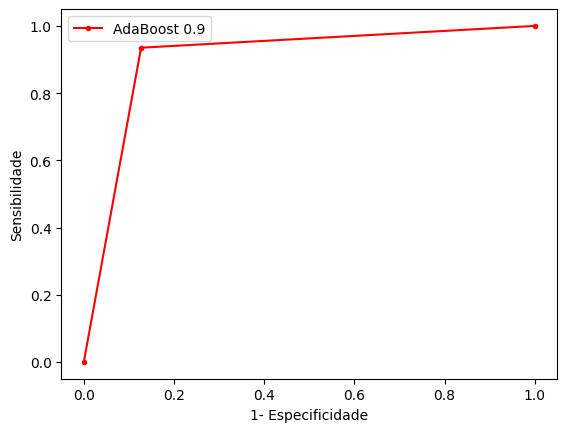

In [73]:
ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, y_predAda)
ada_curva_rocG = roc_auc_score(y_teste,y_predAda)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost "+str(round(ada_curva_rocG, 2)), color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

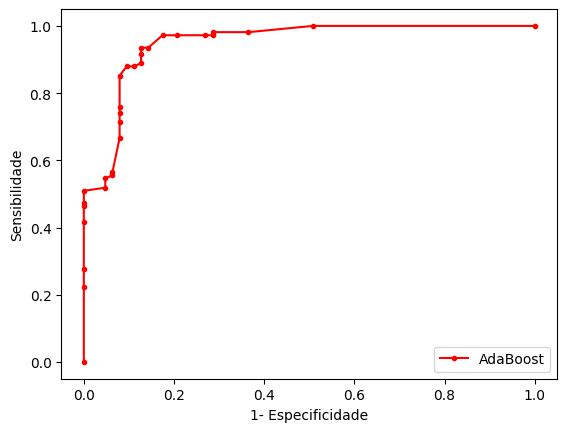

In [74]:
ada_probsG = grid_search.predict_proba(X_test_new)[:,1]

ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, ada_probsG)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost", color="red")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# GBM

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbm = GradientBoostingClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = gbm.fit(X_train_new, y_treino)

gbm_predict = model.predict(X_test_new)

gbm_predict_prob = gbm.predict_proba(X_test_new)

## Gráficos

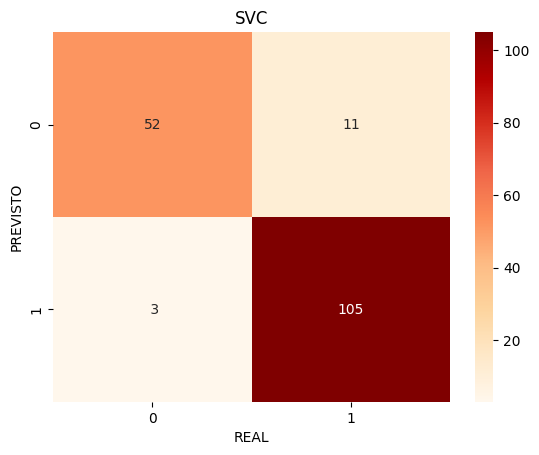

In [77]:
sns.heatmap(confusion_matrix(y_teste, gbm_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

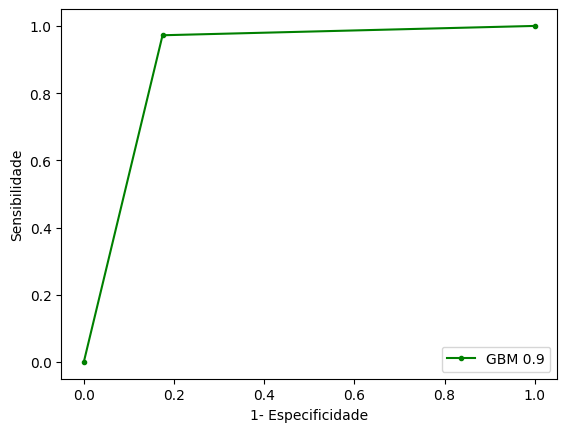

In [78]:
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
gbm_curva_roc = roc_auc_score(y_teste,gbm_predict)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

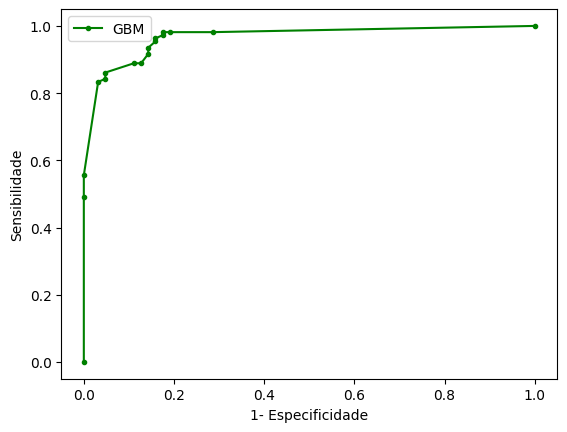

In [79]:
gbm_probs = gbm_predict_prob[:,1]

gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)

plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [80]:
acuracia = accuracy_score(y_teste,gbm_predict)
precisao = precision_score(y_teste,gbm_predict)
recall = recall_score(y_teste,gbm_predict)
f1Score = f1_score(y_teste,gbm_predict)
kappa = cohen_kappa_score(y_teste,gbm_predict)

print('------ GDM ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ GDM ---------

Acurácia: 0.9181286549707602
Precisão: 0.9051724137931034
Recall ou Sensibilidade: 0.9722222222222222
F1-Score: 0.9375
Kappa: 0.8192934782608696


## GridSearchCV

In [81]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42]
}

In [82]:
grid_search = GridSearchCV(gbm, parameters, cv=5)
grid_search.fit(X_train_new, y_treino)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                  n_estimators=30,
                                                  random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300], 'random_state': [42],
                         'subsample': [0.8, 0.9, 1.0]})

In [83]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.8}


In [84]:
gbm_best = grid_search.best_estimator_
y_pred_gbm = gbm_best.predict(X_test_new)

In [85]:
acuracia = accuracy_score(y_teste,y_pred_gbm)
precisao = precision_score(y_teste,y_pred_gbm)
recall = recall_score(y_teste,y_pred_gbm)
f1Score = f1_score(y_teste,y_pred_gbm)
kappa = cohen_kappa_score(y_teste,y_pred_gbm)

print('---------- GBM ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- GBM ---------

Acurácia: 0.9181286549707602
Precisão: 0.9196428571428571
Recall ou Sensibilidade: 0.9537037037037037
F1-Score: 0.9363636363636363
Kappa: 0.82171581769437


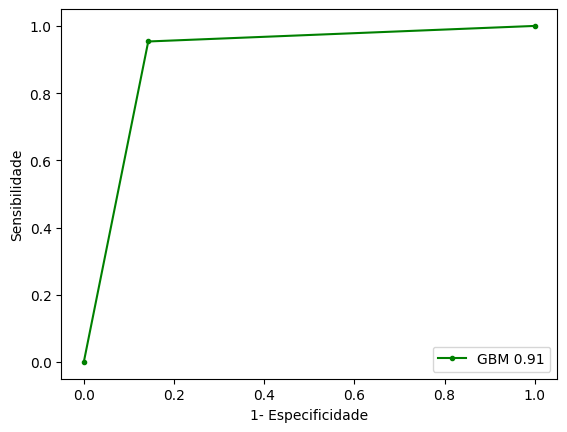

In [86]:
gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, y_pred_gbm)
gbm_curva_rocG = roc_auc_score(y_teste,y_pred_gbm)

plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM "+str(round(gbm_curva_rocG, 2)), color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

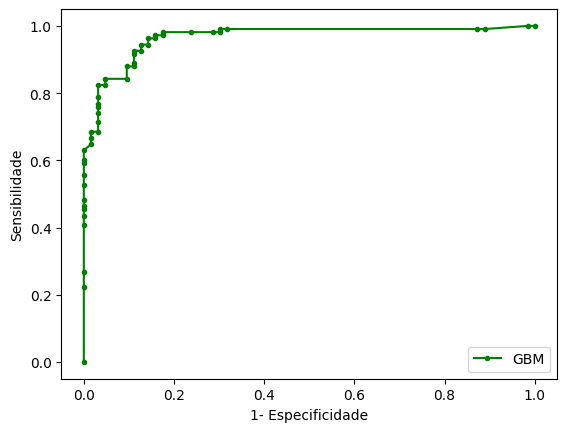

In [87]:
gbm_probsG = grid_search.predict_proba(X_test_new)[:,1]

gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, gbm_probsG)

plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM", color="green")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(n_estimators=estimator, random_state=random_state)

model = rf.fit(X_train_new, y_treino)

rf_predict = model.predict(X_test_new)

rf_predict_prob = rf.predict_proba(X_test_new)

## Gráficos

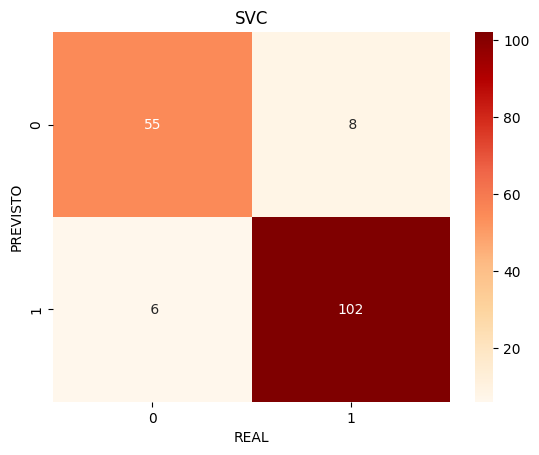

In [90]:
sns.heatmap(confusion_matrix(y_teste, rf_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

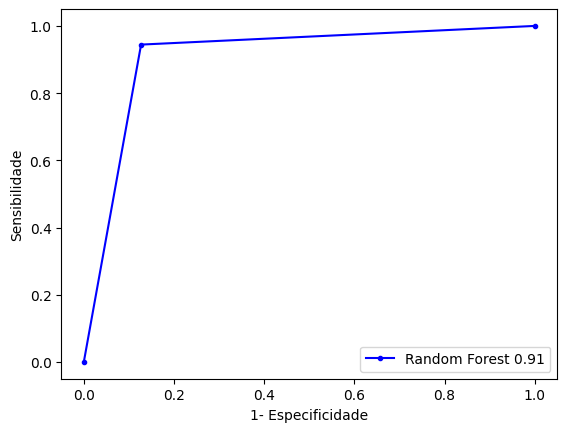

In [91]:
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
rf_curva_roc = roc_auc_score(y_teste,rf_predict)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

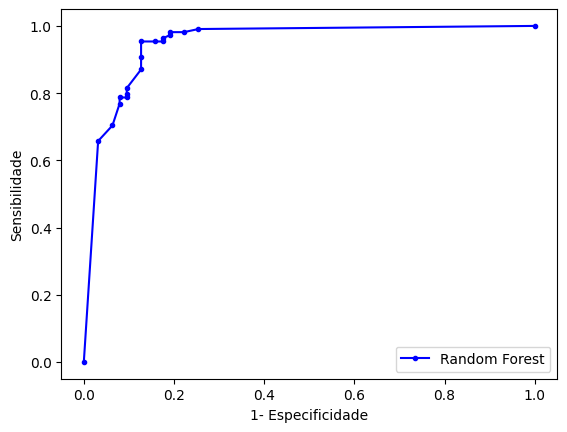

In [92]:
rf_probs = rf_predict_prob[:,1]

rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)

plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [93]:
acuracia = accuracy_score(y_teste,rf_predict)
precisao = precision_score(y_teste,rf_predict)
recall = recall_score(y_teste,rf_predict)
f1Score = f1_score(y_teste,rf_predict)
kappa = cohen_kappa_score(y_teste,rf_predict)

print('------ Random Forest ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ Random Forest ---------

Acurácia: 0.9181286549707602
Precisão: 0.9272727272727272
Recall ou Sensibilidade: 0.9444444444444444
F1-Score: 0.9357798165137615
Kappa: 0.8229027962716378


## GridSearchCV

In [94]:
parameters = { 
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

y_train_1d = y_treino.ravel()

In [95]:
grid_search = GridSearchCV(rf, parameters, cv=5, error_score='raise')
grid_search.fit(X_train_new, y_train_1d)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(n_estimators=30, random_state=42),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [96]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [97]:
rf_best = grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test_new)

In [98]:
acuracia = accuracy_score(y_teste,y_pred_rf)
precisao = precision_score(y_teste,y_pred_rf)
recall = recall_score(y_teste,y_pred_rf)
f1Score = f1_score(y_teste,y_pred_rf)
kappa = cohen_kappa_score(y_teste,y_pred_rf)

print('---------- RandomForest ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- RandomForest ---------

Acurácia: 0.9122807017543859
Precisão: 0.918918918918919
Recall ou Sensibilidade: 0.9444444444444444
F1-Score: 0.9315068493150684
Kappa: 0.8096192384769538


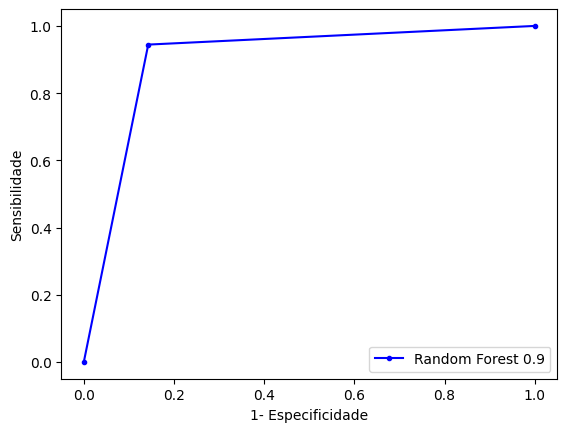

In [99]:
rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, y_pred_rf)
rf_curva_rocG = roc_auc_score(y_teste,y_pred_rf)

plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest "+str(round(rf_curva_rocG, 2)), color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

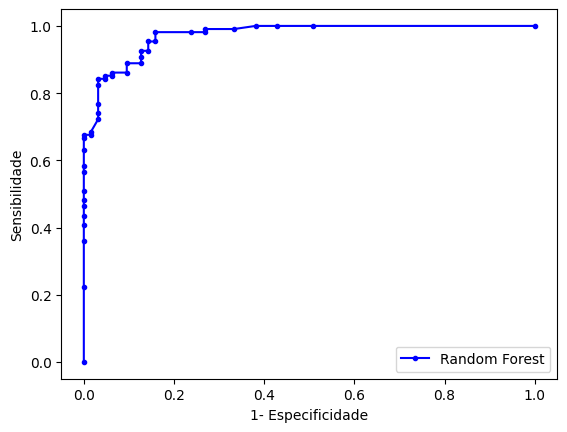

In [100]:
rf_probsG = grid_search.predict_proba(X_test_new)[:,1]

rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, rf_probsG)

plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest", color="blue")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# CatBoost

In [101]:
from catboost import CatBoostClassifier

In [102]:
cat = CatBoostClassifier(n_estimators=estimator, learning_rate=learning, random_state=random_state)

model = cat.fit(X_train_new, y_treino)

cat_predict = model.predict(X_test_new)

cat_predict_prob = cat.predict_proba(X_test_new)

0:	learn: 0.6737394	total: 144ms	remaining: 4.17s
1:	learn: 0.6558903	total: 145ms	remaining: 2.02s
2:	learn: 0.6383380	total: 145ms	remaining: 1.31s
3:	learn: 0.6221068	total: 146ms	remaining: 950ms
4:	learn: 0.6066556	total: 147ms	remaining: 734ms
5:	learn: 0.5910755	total: 148ms	remaining: 592ms
6:	learn: 0.5769136	total: 149ms	remaining: 489ms
7:	learn: 0.5629718	total: 150ms	remaining: 411ms
8:	learn: 0.5489110	total: 150ms	remaining: 350ms
9:	learn: 0.5370167	total: 151ms	remaining: 302ms
10:	learn: 0.5252528	total: 152ms	remaining: 262ms
11:	learn: 0.5137546	total: 152ms	remaining: 229ms
12:	learn: 0.5032635	total: 153ms	remaining: 200ms
13:	learn: 0.4927655	total: 154ms	remaining: 176ms
14:	learn: 0.4830975	total: 155ms	remaining: 155ms
15:	learn: 0.4733464	total: 156ms	remaining: 136ms
16:	learn: 0.4647003	total: 156ms	remaining: 120ms
17:	learn: 0.4555564	total: 157ms	remaining: 105ms
18:	learn: 0.4471981	total: 158ms	remaining: 91.4ms
19:	learn: 0.4392127	total: 159ms	remain

## Gráficos

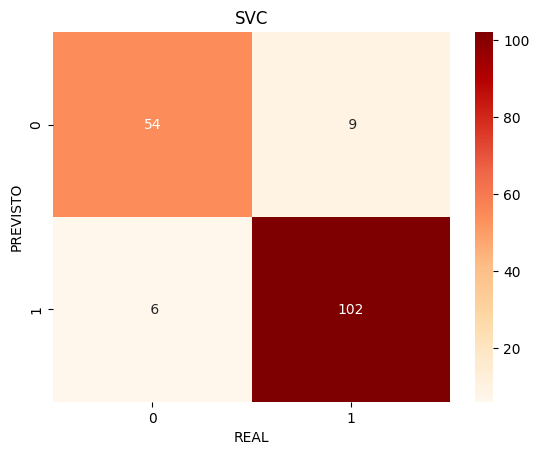

In [103]:
sns.heatmap(confusion_matrix(y_teste, cat_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

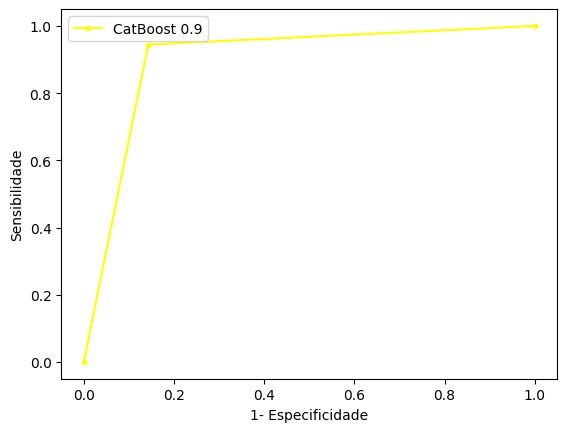

In [104]:
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
cat_curva_roc = roc_auc_score(y_teste,cat_predict)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(gbm_curva_roc, 2)), color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

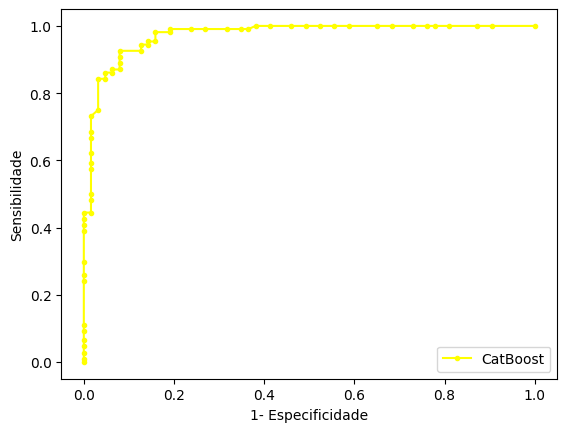

In [105]:
cat_probs = cat_predict_prob[:,1]

cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)

plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [106]:
acuracia = accuracy_score(y_teste,cat_predict)
precisao = precision_score(y_teste,cat_predict)
recall = recall_score(y_teste,cat_predict)
f1Score = f1_score(y_teste,cat_predict)
cat_curva_rocG = roc_auc_score(y_teste,cat_predict)
kappa = cohen_kappa_score(y_teste,cat_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ CatBoost ---------

Acurácia: 0.9122807017543859
Precisão: 0.918918918918919
Recall ou Sensibilidade: 0.9444444444444444
F1-Score: 0.9315068493150684
Kappa: 0.8096192384769538


## GridSearchCV

In [107]:
parameters = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [3, 5, 7],
    'subsample': [0.8, 0.9],
    'colsample_bylevel': [0.8, 0.9],
    'border_count': [32, 64],
    'custom_metric': ['AUC', 'Logloss']
}

In [108]:
grid_search = GridSearchCV(cat, parameters, cv=5)
grid_search.fit(X_train_new, y_treino)

0:	learn: 0.6870652	total: 417us	remaining: 12.1ms
1:	learn: 0.6814873	total: 717us	remaining: 10.1ms
2:	learn: 0.6750699	total: 921us	remaining: 8.29ms
3:	learn: 0.6700313	total: 1.18ms	remaining: 7.67ms
4:	learn: 0.6640671	total: 1.45ms	remaining: 7.23ms
5:	learn: 0.6583549	total: 1.65ms	remaining: 6.58ms
6:	learn: 0.6528172	total: 1.88ms	remaining: 6.17ms
7:	learn: 0.6467570	total: 2.09ms	remaining: 5.74ms
8:	learn: 0.6462247	total: 2.58ms	remaining: 6.03ms
9:	learn: 0.6409926	total: 2.81ms	remaining: 5.62ms
10:	learn: 0.6355964	total: 3.04ms	remaining: 5.26ms
11:	learn: 0.6299926	total: 3.29ms	remaining: 4.93ms
12:	learn: 0.6246241	total: 3.53ms	remaining: 4.62ms
13:	learn: 0.6199528	total: 3.74ms	remaining: 4.27ms
14:	learn: 0.6148052	total: 4.12ms	remaining: 4.12ms
15:	learn: 0.6094819	total: 4.4ms	remaining: 3.85ms
16:	learn: 0.6042598	total: 4.7ms	remaining: 3.6ms
17:	learn: 0.5997205	total: 4.98ms	remaining: 3.32ms
18:	learn: 0.5950362	total: 5.21ms	remaining: 3.02ms
19:	learn

0:	learn: 0.6873575	total: 368us	remaining: 10.7ms
1:	learn: 0.6812984	total: 658us	remaining: 9.22ms
2:	learn: 0.6751337	total: 846us	remaining: 7.62ms
3:	learn: 0.6704289	total: 1.1ms	remaining: 7.17ms
4:	learn: 0.6644345	total: 1.36ms	remaining: 6.82ms
5:	learn: 0.6586811	total: 1.6ms	remaining: 6.41ms
6:	learn: 0.6531946	total: 1.86ms	remaining: 6.13ms
7:	learn: 0.6472846	total: 2.03ms	remaining: 5.59ms
8:	learn: 0.6467432	total: 2.13ms	remaining: 4.97ms
9:	learn: 0.6412578	total: 2.37ms	remaining: 4.74ms
10:	learn: 0.6361023	total: 2.62ms	remaining: 4.53ms
11:	learn: 0.6308989	total: 2.89ms	remaining: 4.34ms
12:	learn: 0.6255555	total: 3.15ms	remaining: 4.12ms
13:	learn: 0.6208784	total: 3.39ms	remaining: 3.87ms
14:	learn: 0.6157359	total: 3.69ms	remaining: 3.69ms
15:	learn: 0.6106027	total: 4.01ms	remaining: 3.51ms
16:	learn: 0.6054332	total: 4.36ms	remaining: 3.34ms
17:	learn: 0.6008054	total: 4.62ms	remaining: 3.08ms
18:	learn: 0.5963244	total: 4.85ms	remaining: 2.81ms
19:	lear

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B043C844F0>,
             param_grid={'border_count': [32, 64],
                         'colsample_bylevel': [0.8, 0.9],
                         'custom_metric': ['AUC', 'Logloss'],
                         'depth': [4, 6, 8], 'l2_leaf_reg': [3, 5, 7],
                         'learning_rate': [0.01, 0.1],
                         'subsample': [0.8, 0.9]})

In [109]:
best_params = grid_search.best_params_
print("Best params: ", best_params)

Best params:  {'border_count': 32, 'colsample_bylevel': 0.8, 'custom_metric': 'AUC', 'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'subsample': 0.8}


In [110]:
cat_best = grid_search.best_estimator_
y_pred_cat = cat_best.predict(X_test_new)

In [111]:
acuracia = accuracy_score(y_teste,y_pred_cat)
precisao = precision_score(y_teste,y_pred_cat)
recall = recall_score(y_teste,y_pred_cat)
f1Score = f1_score(y_teste,y_pred_cat)
kappa = cohen_kappa_score(y_teste,y_pred_cat)

print('---------- CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

---------- CatBoost ---------

Acurácia: 0.9064327485380117
Precisão: 0.9181818181818182
Recall ou Sensibilidade: 0.9351851851851852
F1-Score: 0.9266055045871558
Kappa: 0.7976031957390146


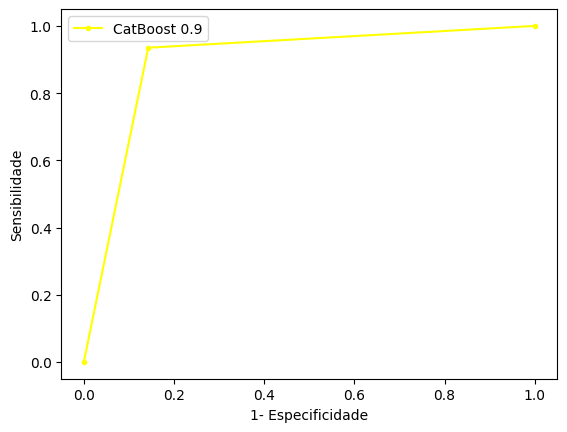

In [112]:
cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, y_pred_cat)
cat_curva_rocG = roc_auc_score(y_teste,y_pred_cat)

plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost "+str(round(gbm_curva_roc, 2)), color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

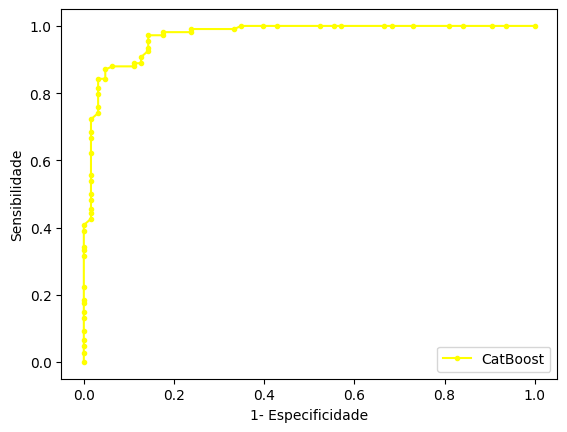

In [113]:
cat_probsG = grid_search.predict_proba(X_test_new)[:,1]

cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, cat_probsG)

plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost", color="yellow")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# SVC

In [114]:
from sklearn.svm import SVC

In [115]:
svc = SVC(random_state=random_state, probability=True)

model = svc.fit(X_train_new, y_treino)

svc_predict = model.predict(X_test_new)

svc_predict_prob = svc.predict_proba(X_test_new)

## Gráficos

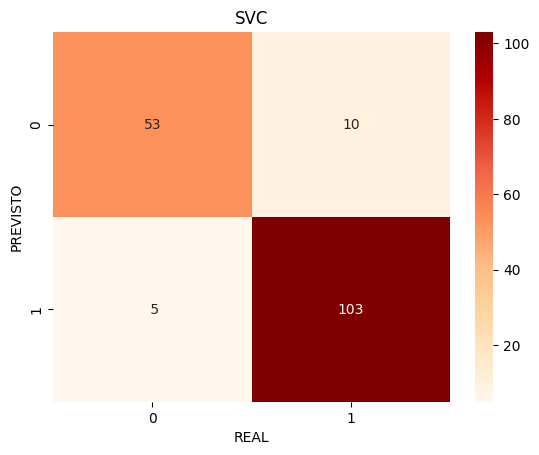

In [116]:
sns.heatmap(confusion_matrix(y_teste, svc_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

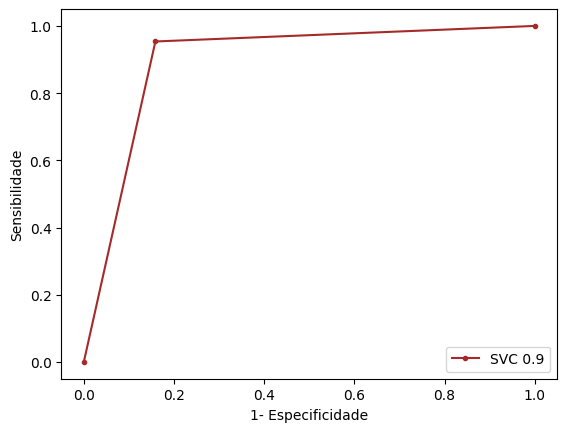

In [117]:
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)
svc_curva_roc = roc_auc_score(y_teste,svc_predict)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

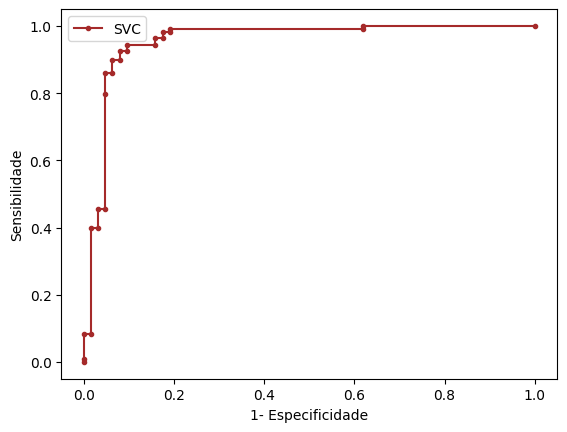

In [118]:
svc_probs = svc_predict_prob[:,1]

svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

## Resultado

In [119]:
acuracia = accuracy_score(y_teste,svc_predict)
precisao = precision_score(y_teste,svc_predict)
recall = recall_score(y_teste,svc_predict)
f1Score = f1_score(y_teste,svc_predict)
svc_curva_rocG = roc_auc_score(y_teste,svc_predict)
kappa = cohen_kappa_score(y_teste,svc_predict)

print('------ CatBoost ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

------ CatBoost ---------

Acurácia: 0.9122807017543859
Precisão: 0.911504424778761
Recall ou Sensibilidade: 0.9537037037037037
F1-Score: 0.9321266968325793
Kappa: 0.808338937457969


## GridSearchCV

In [120]:
parameters = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'coef0': [0.0, 0.1],
    'shrinking': [True, False],
    'probability': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}]
}

In [121]:
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(X_train_new, y_treino)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced', {0: 1, 1: 2}],
                         'coef0': [0.0, 0.1], 'degree': [2, 3],
                         'gamma': ['scale', 'auto', 0.1, 1.0],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True, False],
                         'shrinking': [True, False]})

In [122]:
best_params = grid_search.best_params_
print("Melhores parametros: ", best_params)

Melhores parametros:  {'C': 0.1, 'class_weight': 'balanced', 'coef0': 0.0, 'degree': 2, 'gamma': 1.0, 'kernel': 'rbf', 'probability': True, 'shrinking': True}


In [123]:
svc_best = grid_search.best_estimator_
y_pred_svc = svc_best.predict(X_test_new)

In [124]:
acuracia = accuracy_score(y_teste,y_pred_svc)
precisao = precision_score(y_teste,y_pred_svc)
recall = recall_score(y_teste,y_pred_svc)
f1Score = f1_score(y_teste,y_pred_svc)
kappa = cohen_kappa_score(y_teste,y_pred_svc)

print('--------- SVC ---------\n')
print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Recall ou Sensibilidade: {recall}')
print(f'F1-Score: {f1Score}')
print(f'Kappa: {kappa}')

--------- SVC ---------

Acurácia: 0.9239766081871345
Precisão: 0.9523809523809523
Recall ou Sensibilidade: 0.9259259259259259
F1-Score: 0.9389671361502347
Kappa: 0.8382449246889325


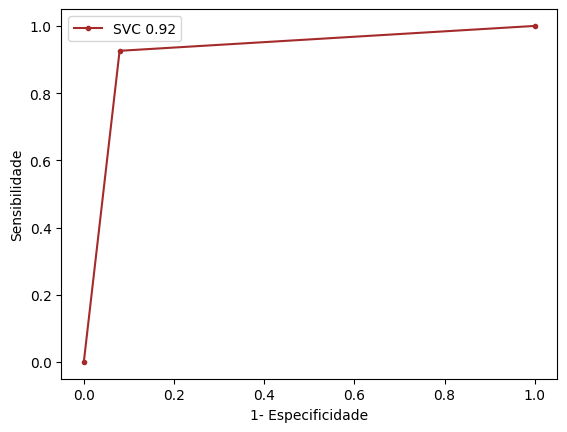

In [125]:
svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, y_pred_svc)
svc_curva_rocG = roc_auc_score(y_teste,y_pred_svc)

plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC "+str(round(svc_curva_rocG, 2)), color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

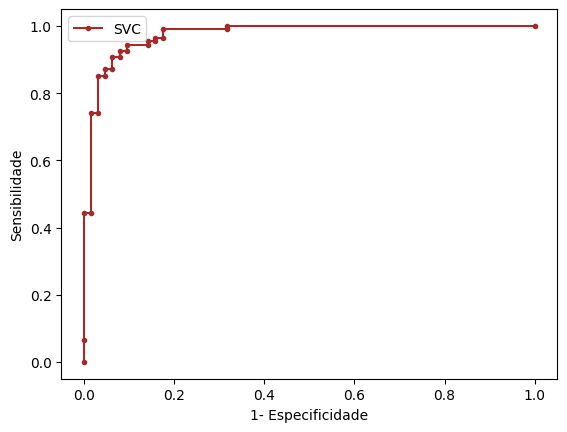

In [126]:
svc_probsG = grid_search.predict_proba(X_test_new)[:,1]

svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, svc_probsG)

plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC", color="brown")

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

# Resultado

## Normal

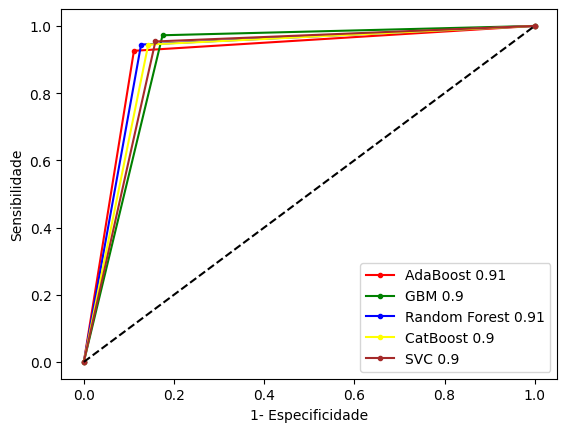

In [127]:
ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_predict)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_predict)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_predict)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_predict)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_predict)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost "+str(round(ada_curva_roc, 2)), color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM "+str(round(gbm_curva_roc, 2)), color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest "+str(round(rf_curva_roc, 2)), color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost "+str(round(cat_curva_roc, 2)), color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC "+str(round(svc_curva_roc, 2)), color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

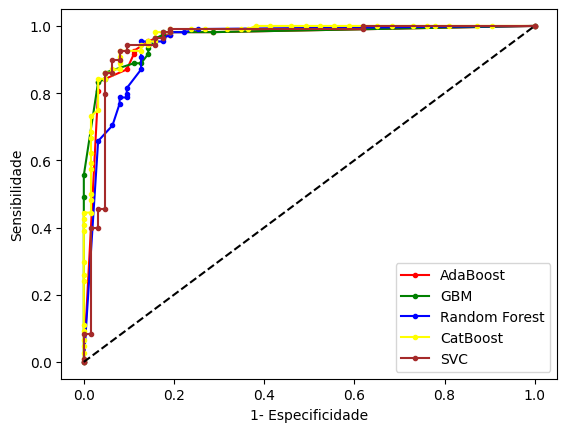

In [128]:
ada_probs = ada_predict_prob[:,1]
gbm_probs = gbm_predict_prob[:,1]
rf_probs = rf_predict_prob[:,1]
cat_probs = cat_predict_prob[:,1]
svc_probs = svc_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probs)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probs)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probs)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probs)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probs)

plt.plot(ada_fp, ada_vp, marker=".", label="AdaBoost", color="red")
plt.plot(gbm_fp, gbm_vp, marker=".", label="GBM", color="green")
plt.plot(rf_fp, rf_vp, marker=".", label="Random Forest", color="blue")
plt.plot(cat_fp, cat_vp, marker=".", label="CatBoost", color="yellow")
plt.plot(svc_fp, svc_vp, marker=".", label="SVC", color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()


## Grid Search

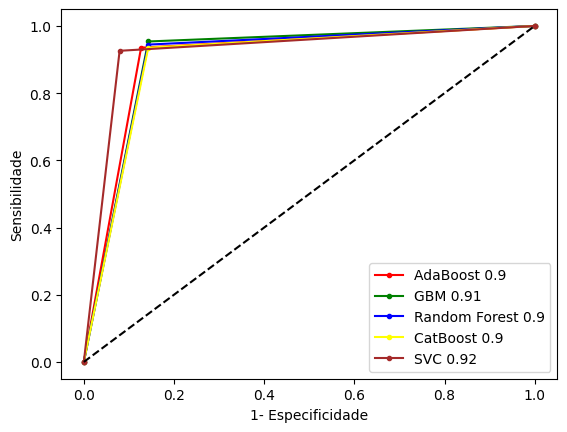

In [129]:
ada_fpG, ada_vpG, lim1G = roc_curve(y_teste, y_predAda)
gbm_fpG, gbm_vpG, lim2G = roc_curve(y_teste, y_pred_gbm)
rf_fpG, rf_vpG, lim3G = roc_curve(y_teste, y_pred_rf)
cat_fpG, cat_vpG, lim4G = roc_curve(y_teste, y_pred_cat)
svc_fpG, svc_vpG, lim5G = roc_curve(y_teste, y_pred_svc)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost "+str(round(ada_curva_rocG, 2)), color="red")
plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM "+str(round(gbm_curva_rocG, 2)), color="green")
plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest "+str(round(rf_curva_rocG, 2)), color="blue")
plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost "+str(round(cat_curva_rocG, 2)), color="yellow")
plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC "+str(round(svc_curva_rocG, 2)), color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()

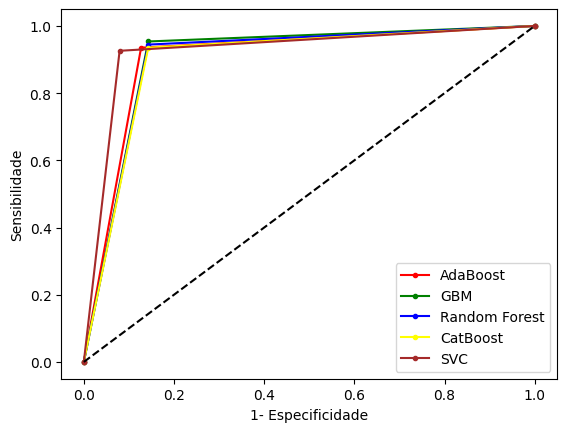

In [130]:
# ada_probs = ada_predict_prob[:,1]
# gbm_probs = gbm_predict_prob[:,1]
# rf_probs = rf_predict_prob[:,1]
# cat_probs = cat_predict_prob[:,1]
# svc_probs = svc_predict_prob[:,1]

ada_fp, ada_vp, lim1 = roc_curve(y_teste, ada_probsG)
gbm_fp, gbm_vp, lim2 = roc_curve(y_teste, gbm_probsG)
rf_fp, rf_vp, lim3 = roc_curve(y_teste, rf_probsG)
cat_fp, cat_vp, lim4 = roc_curve(y_teste, cat_probsG)
svc_fp, svc_vp, lim5 = roc_curve(y_teste, svc_probsG)

plt.plot(ada_fpG, ada_vpG, marker=".", label="AdaBoost", color="red")
plt.plot(gbm_fpG, gbm_vpG, marker=".", label="GBM", color="green")
plt.plot(rf_fpG, rf_vpG, marker=".", label="Random Forest", color="blue")
plt.plot(cat_fpG, cat_vpG, marker=".", label="CatBoost", color="yellow")
plt.plot(svc_fpG, svc_vpG, marker=".", label="SVC", color="brown")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')

plt.legend()

plt.show()